<a href="https://colab.research.google.com/github/itspallavi20/Oral_Diseases_Prediction/blob/main/dental_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
os.environ['KAGGLE_CONFIG_DIR']='/content'
base_dir = '/content/drive/My Drive/Oral_Diseases_Project'
train_dir = '/content/drive/My Drive/Oral_Diseases_Project/Dataset/Train'
val_dir = '/content/drive/My Drive/Oral_Diseases_Project/Dataset/Validation'
sample_images_dir = '/content/drive/My Drive/Oral_Diseases_Project/Dataset/Sample_Images'

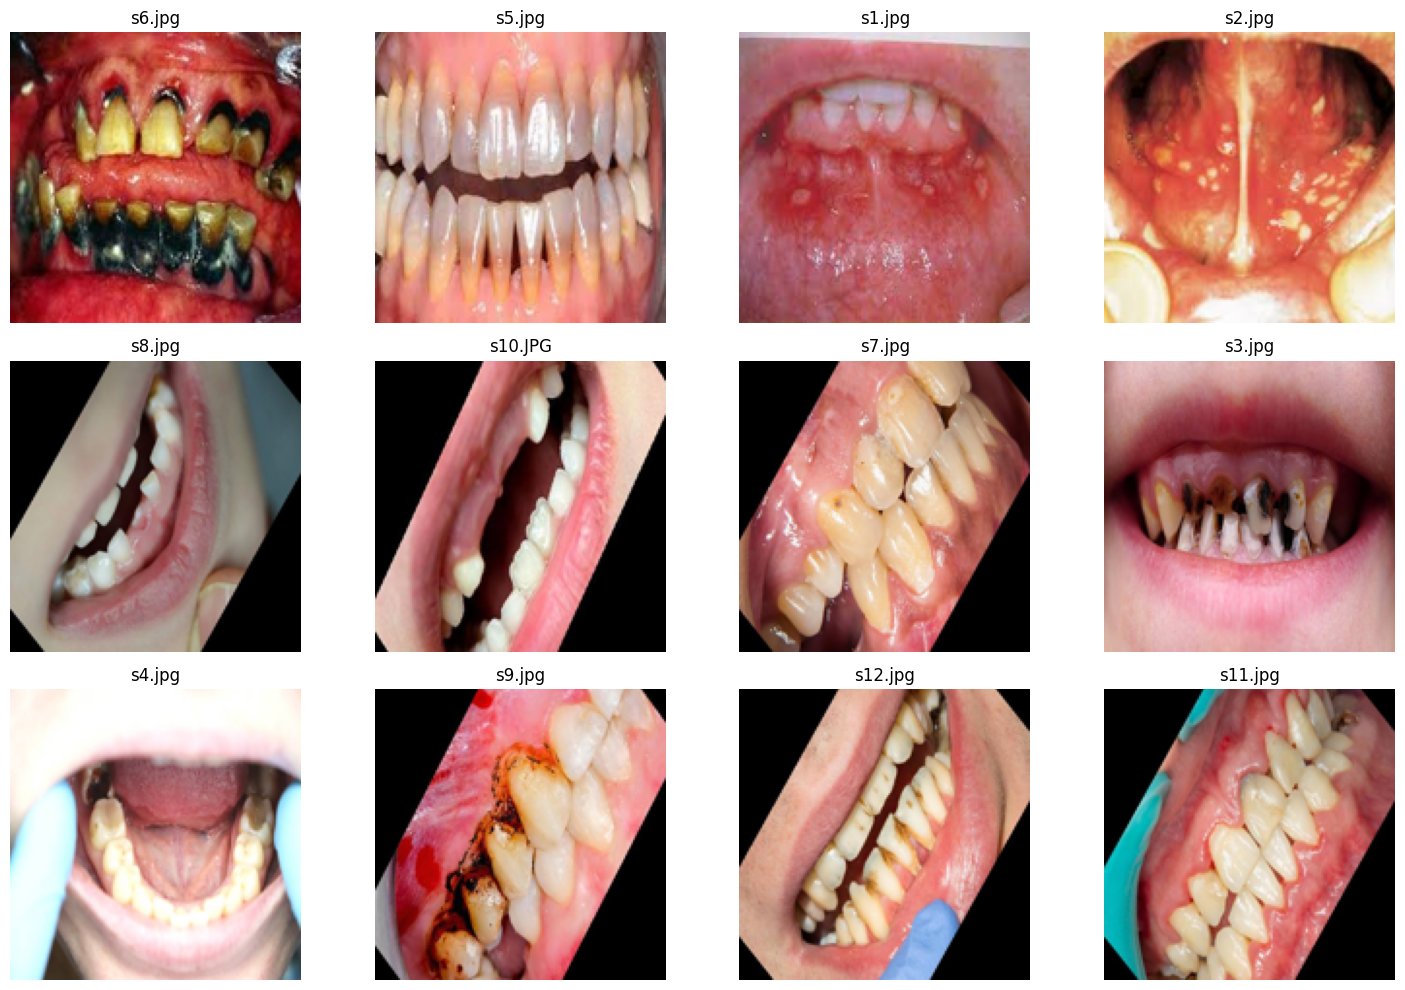

In [30]:
def display_sample_images(sample_images_dir, num_images=12):
    images = os.listdir(sample_images_dir)
    num_images = min(num_images, len(images))
    plt.figure(figsize=(15, 10))
    for count, image in enumerate(images[:num_images]):
        img_path = os.path.join(sample_images_dir, image)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        plt.subplot(3, 4, count + 1)
        plt.imshow(img)
        plt.title(image)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
'display_sample_images(sample_images_dir, num_images=12)

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values between 0 and 1
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True  # Randomly flip images horizontally
)

val_datagen = ImageDataGenerator(
    rescale=1.0/255  # Normalize validation data
)

# Create the training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

# Create the validation generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 4776 images belonging to 6 classes.
Found 782 images belonging to 6 classes.


In [34]:
from tensorflow.keras import layers, models, optimizers

# Build a CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fourth convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # To prevent overfitting

# Output layer (6 classes for classification)
model.add(layers.Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

# Display model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,681,606 (36.93 MB)

 Trainable params: 9,681,606 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Set training parameters
batch_size = 32
epochs = 10

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 1420s 9s/step - accuracy: 0.4325 - loss: 1.3890 - val_accuracy: 0.4805 - val_loss: 1.2965
Epoch 2/10
  1/149 ━━━━━━━━━━━━━━━━━━━━ 9:31 4s/step - accuracy: 0.5000 - loss: 1.3851

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5000 - loss: 1.3851 - val_accuracy: 0.4286 - val_loss: 1.3377
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 795s 5s/step - accuracy: 0.5273 - loss: 1.1805 - val_accuracy: 0.5039 - val_loss: 1.1533
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6250 - loss: 0.9388 - val_accuracy: 0.5000 - val_loss: 1.1990
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 797s 5s/step - accuracy: 0.5766 - loss: 1.0384 - val_accuracy: 0.5365 - val_loss: 1.1676
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5000 - loss: 1.3538 - val_accuracy: 0.5714 - val_loss: 0.9214
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 755s 5s/step - accuracy: 0.5859 - loss: 1.0081 - val_accuracy: 0.5182 - val_loss: 1.2109
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7188 - loss: 0.8261 - val_accuracy: 0.5714 - val_loss: 0.9280
Epoch 9/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 795s 5s/step - accuracy: 0.6137 - loss: 0.9502 - val_accuracy: 0.5651 - 

In [39]:
val_acc = history.history['val_accuracy'][epoch] * 100
print(f"Final Validation Accuracy: {val_acc:.4f}")

Final Validation Accuracy: 71.4286
